In [2]:
import numpy as np
import pandas as pd
import os
import re
import time

from gensim.models import Word2Vec
from tqdm import tqdm

In [3]:
replies_df = pd.read_csv('./replies_df.csv')

In [6]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


# from wordcloud import STOPWORDS
def get_stopwords():
    # stop = set(STOPWORDS)
    stop = stopwords.words('english')
    custom_words_sen = 'really, like, way, much , still, but, find, need, you, many, lot, always, say, could, well, even, the'

    custom_words = custom_words_sen.split(', ')

    custom_stop = stop + custom_words
    return custom_stop

In [8]:
def preprocess_news(df=replies_df,lowercase=False):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    stop = get_stopwords()
    for threads in replies_df['reply']:
        if lowercase == True:
            words=[str.lower(w) for w in word_tokenize(threads) if (w not in stop)]
        else:
            words=[w for w in word_tokenize(threads) if (w not in stop)]
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        corpus.append(words)
    return corpus

corpus_lowercase =preprocess_news(replies_df, True)

In [11]:
print(corpus_lowercase[:2])

[['stao', 'response', 't64fx', 'change', 'depending', 'blade', "'re", 'using', 'usually', 'primorac', 'carbon', 'offensive', 'player', 'agressive', 'top', 'spin', 'used', 't05fx', 'appreciate', 'general', 'feeling', 't64fx', 'softer', 'faster', '05fx', 'hand', 'le', 'spin', 'very', 'good', 'block', 'for', 'style', 'prefer', 't64fx', 't05fx', '2.1', 'bought', 'recently', 'complete', 'garaydia', 'family', 'see', 'blade', 'possibility', 'improve', 'skill', 'would', 'no.with', 'alc', 'soft', 'slow', 't5000', 'fast', 'zlc', 'softer', 'touch', 'alternative', 'truly', 'amazed', 'huge', 'difference', 'blades.to', 'finish', 'currently', 'glueing', 'dignics', 'primorac', 'carbon', 'test', 'season', 'ended', 'training', "'ll", 'see', 'fit', 'test', 'garaydia', 't5000', 'garaydia', 'zlc', 'seeking', 'spin', '...'], ['also', 'interested']]


In [36]:
# https://www.kaggle.com/chewzy/tutorial-how-to-train-your-custom-word-embedding

model = Word2Vec(sentences=corpus_lowercase, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [16]:
len(model.wv.vocab.keys())

1399

In [27]:
print(model.wv.vocab.keys())

dict_keys(['response', 't64fx', 'change', 'depending', 'blade', "'re", 'using', 'usually', 'primorac', 'carbon', 'offensive', 'player', 'top', 'spin', 'used', 't05fx', 'appreciate', 'general', 'feeling', 'softer', 'faster', '05fx', 'hand', 'le', 'very', 'good', 'block', 'for', 'style', 'prefer', '2.1', 'bought', 'recently', 'family', 'see', 'improve', 'skill', 'would', 'alc', 'soft', 'slow', 'fast', 'zlc', 'touch', 'alternative', 'huge', 'difference', 'currently', 'dignics', 'test', 'season', 'ended', 'training', "'ll", 'fit', '...', 'also', 'interested', 'maybe', 'ttd', 'start', 'rubber', 'know', 'short', 'pip', 'think', 'someone', 'play', 'three', 'considered', 'grippy', 'create', 'effect', '802', 'glue', 'two', 'bit', 'hardest', 'feel', 'hard', 'try', 'google', 'alot', 'ask', 'forum', 'they', 'pimple', 'guy', 'how', 'want', 'use', 'pretty', 'different', 'some', 'one', 'better', 'another', 'several', 'month', 'degree', 'sponge', 'heavy', 'boosted', 'tested', 'both', 'reacts', 'much',

In [17]:
model.wv.vector_size

100

In [18]:
model.wv.get_vector('speed')

array([-0.16829066, -0.05715205, -0.06540787,  0.12007315, -0.04903476,
        0.22983007, -0.14760633,  0.1600666 , -0.23573405,  0.03364509,
        0.24682416,  0.15199186, -0.15821251, -0.06940357, -0.04192653,
       -0.1509009 ,  0.07531299, -0.30070657,  0.03358845,  0.10145789,
       -0.175297  , -0.02297324, -0.21395536,  0.06869911,  0.14575441,
        0.18957736, -0.12513481, -0.06674452,  0.12062386, -0.13321027,
       -0.10844035,  0.15176205, -0.00758308, -0.17613736, -0.00949936,
       -0.02316132, -0.04202395,  0.01241096, -0.27382994,  0.11073865,
        0.19628438, -0.21965736, -0.15647586,  0.28720513,  0.18930556,
       -0.00783611,  0.01088891,  0.04728015,  0.0305271 ,  0.00902763,
       -0.2518654 ,  0.1151575 ,  0.15687259, -0.2558326 , -0.03006678,
        0.01943662,  0.13452484,  0.04449085, -0.04863555, -0.0466919 ,
       -0.14497414,  0.0243115 , -0.04149826, -0.3457123 , -0.0691382 ,
       -0.16142748,  0.07180093,  0.11925397,  0.11623839,  0.15

In [29]:
model.wv.most_similar('ten05')

[('proper', 0.9994490742683411),
 ('noticeably', 0.9994410276412964),
 ('equal', 0.9994335174560547),
 ('reviewer', 0.9994073510169983),
 ('comparison', 0.999402642250061),
 ('still', 0.9993979334831238),
 ('area', 0.9993978142738342),
 ('more', 0.9993962049484253),
 ('increase', 0.9993873834609985),
 ('older', 0.9993853569030762)]

In [19]:
model.wv.most_similar('speed')

[('easier', 0.9934545755386353),
 ('angle', 0.9923799633979797),
 ('power', 0.9911880493164062),
 ('hit', 0.9907858371734619),
 ('higher', 0.99042809009552),
 ('bit', 0.9901906251907349),
 ('low', 0.98968505859375),
 ('little', 0.9891588687896729),
 ('arc', 0.9885221719741821),
 ('stroke', 0.9881170392036438)]

In [20]:
model.wv.most_similar('fast')

[('quite', 0.9970472455024719),
 ('spinny', 0.9966941475868225),
 ('flat', 0.996411919593811),
 ('sensitive', 0.9961768984794617),
 ('serf', 0.9959430694580078),
 ('blocking', 0.9955519437789917),
 ('high', 0.9954133033752441),
 ('hitting', 0.9946086406707764),
 ('great', 0.9942514896392822),
 ('push', 0.9934906959533691)]

In [22]:
model.wv.most_similar('tenergy')

[('calibra', 0.9966277480125427),
 ('evolution', 0.9952017664909363),
 ('yasaka', 0.9950525164604187),
 ('tour', 0.9948242902755737),
 ('rakza', 0.9947068095207214),
 ('pretty', 0.9946892261505127),
 ('mark', 0.9939993619918823),
 ('recommend', 0.9939830899238586),
 ('look', 0.9939225316047668),
 ('series', 0.9933728575706482)]

In [28]:
model.wv.most_similar('h3-50')

[('sale', 0.9993939995765686),
 ('barracuda', 0.9993720650672913),
 ('friendship', 0.9993481636047363),
 ('lighter', 0.9993479251861572),
 ('us', 0.9993048310279846),
 ('following', 0.9993033409118652),
 ('super', 0.9992897510528564),
 ('3-60', 0.9992702007293701),
 ('popular', 0.9992560744285583),
 ('say', 0.9992340803146362)]

In [26]:
model.wv.most_similar('rubber')

[('both', 0.9919931888580322),
 ('love', 0.9917461276054382),
 ('nimbus', 0.9913538098335266),
 ('type', 0.9913371801376343),
 ('think', 0.9912756681442261),
 ('basically', 0.9911566972732544),
 ('want', 0.9911171793937683),
 ('give', 0.9907335638999939),
 ('chinese', 0.9906983375549316),
 ('fact', 0.9905658960342407)]

In [23]:
model.wv.save_word2vec_format('custom_word2vec.txt')

* not useful at all

# tsne

In [58]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    word_vector = model.wv
    close_words = word_vector.similar_by_word(word)
    arr = np.append(arr, np.array([word_vector[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = word_vector[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

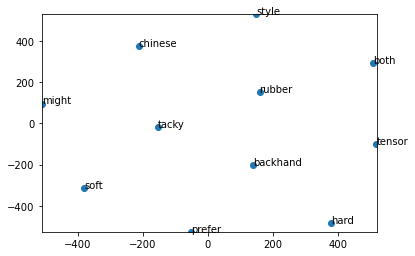

In [59]:
display_closestwords_tsnescatterplot(model, 'rubber', 50) 